Code to classify race 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
path = "C:/Users/shrra/Downloads/2024-06-25T13-17_export.csv"
datafram =pd.read_csv(path)

race_columns = ['race___1', 'race___2', 'race___3', 'race___4', 'race___5','race___6', 'race___7','race___8']

race_counts = datafram[race_columns].sum()
print(race_counts)

race___1      5
race___2      9
race___3     14
race___4      0
race___5    149
race___6      0
race___7      6
race___8      4
dtype: int64


In [3]:
race_columns = ['race___1', 'race___2', 'race___3', 'race___4', 'race___5','race___6', 'race___7','race___8']
true_counts = datafram[race_columns].sum(axis=1)

true_counts = datafram[race_columns].sum(axis=1)


datafram = datafram[(true_counts < 2) & (~datafram['race___8'])]

datafram = datafram.reset_index(drop=True)


print(len(datafram))
race_counts = datafram[race_columns].sum()
print(race_counts)

169
race___1      1
race___2      7
race___3     11
race___4      0
race___5    144
race___6      0
race___7      6
race___8      0
dtype: int64


In [4]:
def determine_new_race_5(row):
    if row['race___5']:
        return True
    else:
        return row['race___5']


datafram['new_race___5'] = datafram.apply(determine_new_race_5, axis=1)
datafram = datafram[~((datafram['race___5'] == False) & (datafram['race___8'] == True))]

race_columns = ['race___1', 'race___2', 'race___3', 'race___4', 'race___5','race___6', 'race___7','race___8','new_race___5']  
race_counts = datafram[race_columns].sum()
print(race_counts)
print(len(datafram))

race___1          1
race___2          7
race___3         11
race___4          0
race___5        144
race___6          0
race___7          6
race___8          0
new_race___5    144
dtype: int64
169


In [5]:
import os
import json
import pandas as pd

df = datafram

def add_json_contents_to_df(df, base_folder_path):
    json_data_list = []
    
    for record_id in df['record_id']:
        json_file_name = f"sub-{record_id}_participant.json"
        folder_path = os.path.join(base_folder_path, f'sub-{record_id}')
        json_file_path = os.path.join(folder_path, json_file_name)
        
        if os.path.exists(json_file_path):
            with open(json_file_path, 'r') as file:
                json_data = json.load(file)
                emp_data = {'record_id': record_id}
                
                for item in json_data.get('item', []):
                    link_id = item.get('linkId')
                    answer_value = None
                    if 'answer' in item and item['answer']:
                        answer = item['answer'][0]
                        if 'valueString' in answer:
                            answer_value = answer['valueString']
                        elif 'valueBoolean' in answer:
                            answer_value = answer['valueBoolean']
                    
                    emp_data[link_id] = answer_value
                
                json_data_list.append(emp_data)
        else:
            print(f"JSON file not found for record_id: {record_id}")

    json_df = pd.DataFrame(json_data_list)

    json_df = json_df.drop_duplicates(subset='record_id')
    
    print("Original DataFrame record count:", len(df))
    print("JSON DataFrame record count:", len(json_df))

    merged_df = pd.merge(df, json_df, on='record_id', how='left')
    
    print("Merged DataFrame record count:", len(merged_df))
    
    return merged_df

merged_df = add_json_contents_to_df(df, base_folder_path='C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/')
print(merged_df)


Original DataFrame record count: 169
JSON DataFrame record count: 167
Merged DataFrame record count: 169
     Unnamed: 0                             record_id  \
0             1  1b07b18b-26f9-405b-a466-29442306a7fe   
1             2  e5db3e0c-6589-4a15-a5e7-8a95e4ed34a5   
2             3  943a8bbc-bba0-4853-825c-10cae1b26ddd   
3             4  d5aeba9f-c910-4b65-81e8-0e9ad15097e7   
4             5  4c55b481-e8a5-41fe-94c3-61d64f7a0ae2   
..          ...                                   ...   
164         174  2b1c662a-59e0-4b69-9161-a2fd4636890b   
165         175  66a03988-159c-4a3a-954b-7b4fc8320b51   
166         176  dbd7641f-f3db-4d08-8f63-2e0e7bbb8f3d   
167         177  8e9349f8-64f6-4558-ac9b-4d15c7649a80   
168         178  ba749edd-38d9-4f87-8742-c71010177050   

                  demographics_session_id  demographics_duration  \
0    8F8E68BB-E68C-4EA5-B71A-17D7AAE915C2                    258   
1    B94FE4BC-79FF-46A1-86CC-628E2D77874E                    249   
2    3

In [6]:
selected_json_columns = [
    'demographics_session_id', 'demographics_duration', 'demographics_completed_by___1',
    'demographics_completed_by___2', 'demographics_completed_by___3', 'state_province', 'country',
    'gender_identity', 'specify_gender_identity', 'sexual_orientation', 'race___1', 'race___2',
    'race___3', 'race___4', 'race___5', 'race___6', 'race___7', 'race___8', 'ethnicity', 'other_edu_level',
    'hearing', 'vision', 'cognition', 'mobility', 'self_care', 'independent_living', 'employ_status___1',
    'employ_status___2', 'employ_status___3', 'employ_status___4', 'employ_status___5', 'employ_status___6',
    'employ_status___7', 'employ_status___8', 'employ_status___9', 'household_income_usa', 'household_income_ca',
    'marital_status___1', 'marital_status___2', 'marital_status___3', 'marital_status___4', 'marital_status___5',
    'marital_status___6', 'marital_status___7', 'housing_status', 'household_count', 'spouse_partner_sig_other',
    'children', 'parent', 'grandparent', 'other_live_with', 'others_household_specify', 'transportation_yn',
    'primary_transportation', 'q_generic_demographics_complete', 'new_race___5', 'selected_language',
    'enrollment_institution', 'age', 'eligible_studies___1', 'eligible_studies___2', 'eligible_studies___3',
    'eligible_studies___4', 'eligible_studies___5', 'is_control_participant', 'laryng_cancer', 'benign_cord_lesion',
    'rrp', 'spas_dys', 'voc_fold_paralysis', 'alz_dementia_mci', 'als', 'parkinsons', 'alcohol_subst_abuse', 'gad',
    'add_adhd', 'asd', 'bipolar', 'bpd', 'depression', 'ed', 'insomnia', 'ocd', 'panic', 'ptsd', 'schizophrenia',
    'soc_anx_dis', 'other_psych', 'asthma', 'airway_stenosis', 'chronic_cough', 'copd', 'osa']


selected_df = merged_df

df = selected_df[selected_json_columns]

def count_boolean_values(df):
    boolean_counts = {}
    for column in df.columns:
        if df[column].dtype == 'bool':
            counts = df[column].value_counts()
            boolean_counts[column] = {
                'True': counts.get(True, 0),
                'False': counts.get(False, 0)
            }
    return boolean_counts


boolean_value_counts = count_boolean_values(df)

for column, counts in boolean_value_counts.items():
    print(f"Column: {column}")
    print(f"True: {counts['True']}")
    print(f"False: {counts['False']}")
    print()

Column: demographics_completed_by___1
True: 168
False: 1

Column: demographics_completed_by___2
True: 3
False: 166

Column: demographics_completed_by___3
True: 1
False: 168

Column: race___1
True: 1
False: 168

Column: race___2
True: 7
False: 162

Column: race___3
True: 11
False: 158

Column: race___4
True: 0
False: 169

Column: race___5
True: 144
False: 25

Column: race___6
True: 0
False: 169

Column: race___7
True: 6
False: 163

Column: race___8
True: 0
False: 169

Column: employ_status___1
True: 3
False: 166

Column: employ_status___2
True: 50
False: 119

Column: employ_status___3
True: 8
False: 161

Column: employ_status___4
True: 4
False: 165

Column: employ_status___5
True: 12
False: 157

Column: employ_status___6
True: 18
False: 151

Column: employ_status___7
True: 69
False: 100

Column: employ_status___8
True: 10
False: 159

Column: employ_status___9
True: 9
False: 160

Column: marital_status___1
True: 28
False: 141

Column: marital_status___2
True: 90
False: 79

Column: marita

In [7]:
removed_selected_df = selected_df[~((selected_df['record_id'] == 'ecf91a76-d72f-42e0-85e1-da9f2a7063f2') | (selected_df['record_id'] == 'eed0e4a4-c915-4ada-9d23-9e0c56fa0d37'))]

# for index, row in removed_selected_df.iterrows():
#     if row['record_id'] == 'ecf91a76-d72f-42e0-85e1-da9f2a7063f2':
#         print('YES')


count_boolean_values(removed_selected_df)

{'demographics_completed_by___1': {'True': 166, 'False': 1},
 'demographics_completed_by___2': {'True': 3, 'False': 164},
 'demographics_completed_by___3': {'True': 1, 'False': 166},
 'race___1': {'True': 1, 'False': 166},
 'race___2': {'True': 7, 'False': 160},
 'race___3': {'True': 11, 'False': 156},
 'race___4': {'True': 0, 'False': 167},
 'race___5': {'True': 142, 'False': 25},
 'race___6': {'True': 0, 'False': 167},
 'race___7': {'True': 6, 'False': 161},
 'race___8': {'True': 0, 'False': 167},
 'employ_status___1': {'True': 3, 'False': 164},
 'employ_status___2': {'True': 50, 'False': 117},
 'employ_status___3': {'True': 8, 'False': 159},
 'employ_status___4': {'True': 4, 'False': 163},
 'employ_status___5': {'True': 12, 'False': 155},
 'employ_status___6': {'True': 17, 'False': 150},
 'employ_status___7': {'True': 68, 'False': 99},
 'employ_status___8': {'True': 10, 'False': 157},
 'employ_status___9': {'True': 9, 'False': 158},
 'marital_status___1': {'True': 28, 'False': 139},

True: 142
False: 25

Increase true count to work with original sample size

Below is undersampled

In [8]:



import pandas as pd
from sklearn.model_selection import train_test_split

def split_dataset(df, target_column, true_count=35, false_count=25, random_state=42):

    df_true = df[df[target_column] == True].sample(n=true_count, random_state=random_state)
    df_false = df[df[target_column] == False].sample(n=false_count, random_state=random_state)
    df_filtered = pd.concat([df_true, df_false]).reset_index(drop=True)

    #train (80%), validation (10%), and test (10%) sets
    df_train, df_temp = train_test_split(df_filtered, test_size=0.2, random_state=random_state, stratify=df_filtered[target_column])
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=random_state, stratify=df_temp[target_column])

    return df_train, df_val, df_test


df = removed_selected_df

df_train, df_val, df_test = split_dataset(df, target_column='new_race___5')

print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

print("Training set distribution:")
print(df_train['new_race___5'].value_counts())
print("Validation set distribution:")
print(df_val['new_race___5'].value_counts())
print("Test set distribution:")
print(df_test['new_race___5'].value_counts())


Training set size: 48
Validation set size: 6
Test set size: 6
Training set distribution:
new_race___5
True     28
False    20
Name: count, dtype: int64
Validation set distribution:
new_race___5
True     4
False    2
Name: count, dtype: int64
Test set distribution:
new_race___5
False    3
True     3
Name: count, dtype: int64


RF

Validation Accuracy: 0.84
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.84      1.00      0.91        21

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25

Test Accuracy: 0.8076923076923077
Test Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.84      0.95      0.89        22

    accuracy                           0.81        26
   macro avg       0.42      0.48      0.45        26
weighted avg       0.71      0.81      0.76        26



c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

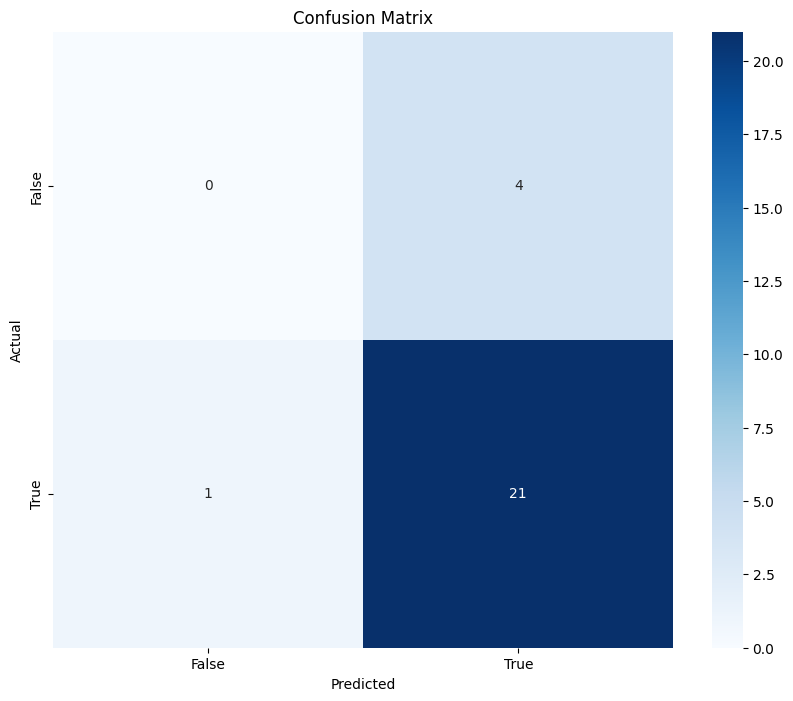

In [10]:
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_audio(file_name, duration=20):

    try:
        y, sr = librosa.load(file_name, sr=None, duration=duration)
        return y
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name}")
        return None

df = selected_df

def process_data(df_split, base_dir, target_audio_suffix):
    features = []
    labels = []

    for _, row in df_split.iterrows():
        subject_id = f"sub-{row['record_id']}"
        session_id = f"ses-{row['demographics_session_id']}"
        race = row['new_race___5']
        subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')

        for file_name in os.listdir(subject_folder):
            if file_name.endswith(target_audio_suffix):
                file_path = os.path.join(subject_folder, file_name)
                audio_data = load_audio(file_path)
                if audio_data is not None:
                    features.append(audio_data)
                    labels.append(race)
                break

    max_length = max(len(x) for x in features)
    features = np.array([np.pad(x, (0, max_length - len(x))) for x in features])

    return features, np.array(labels)

base_dir = 'C:/Users/shrra/Downloads/Bridge2AI_fil/bridge2ai-voice-corpus-2-including-sensitive-recordings/bids_with_sensitive_recordings/'
target_audio_suffix = 'Rainbow-Passage_rec-Rainbow-Passage_trimmed.wav'


X_train, y_train = process_data(df_train, base_dir, target_audio_suffix)
X_val, y_val = process_data(df_val, base_dir, target_audio_suffix)
X_test, y_test = process_data(df_test, base_dir, target_audio_suffix)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = model.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

conf_mat = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()





RF with mel

Validation Accuracy: 0.3333333333333333
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.50      0.50      0.50         4

    accuracy                           0.33         6
   macro avg       0.25      0.25      0.25         6
weighted avg       0.33      0.33      0.33         6

Test Accuracy: 0.5
Test Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.33      0.40         3
        True       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



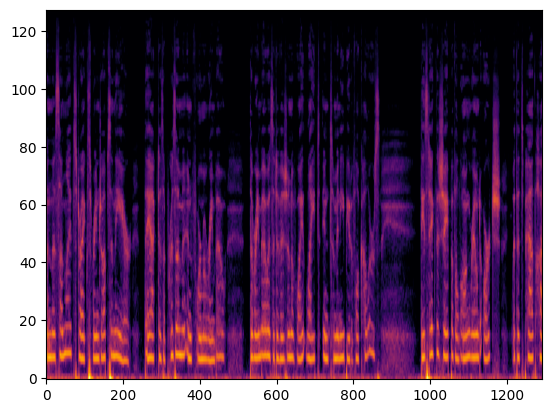

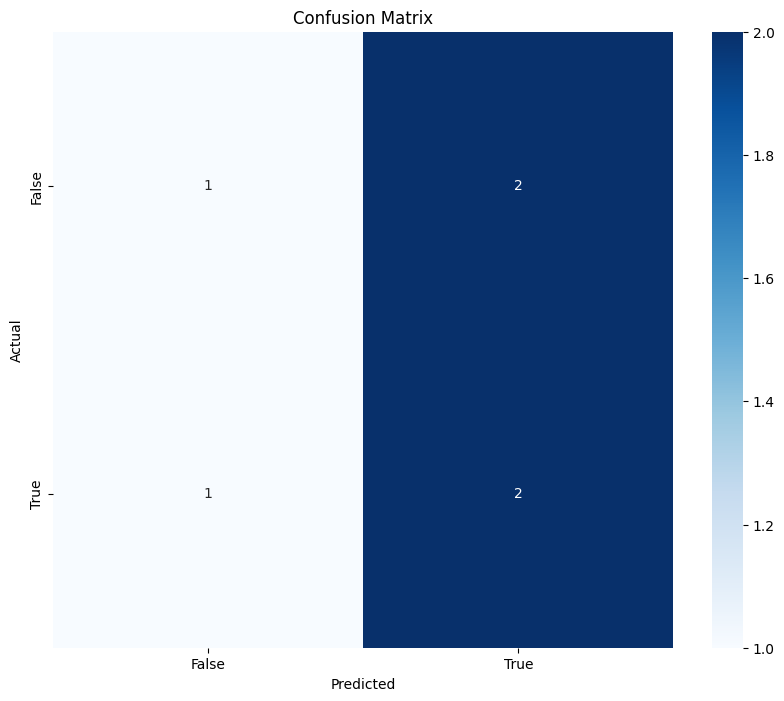

In [11]:
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_mel_spectrogram(file_name, duration=15, n_mels=128):

    try:
        y, sr = librosa.load(file_name, sr=None, duration=duration)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        plt.imshow(mel_spectrogram_db, aspect='auto', origin='lower', cmap='inferno')
        return mel_spectrogram_db
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name}")
        return None


base_dir = 'C:/Users/shrra/Downloads/Bridge2AI_fil/bridge2ai-voice-corpus-2-including-sensitive-recordings/bids_with_sensitive_recordings/'
target_audio_suffix = 'Rainbow-Passage_rec-Rainbow-Passage_trimmed.wav'

features_train = []
labels_train = []
features_val = []
labels_val = []
features_test = []
labels_test = []


def process_dataset(df_split, features_list, labels_list):
    for _, row in df_split.iterrows():
        subject_id = f"sub-{row['record_id']}"
        session_id = f"ses-{row['demographics_session_id']}"
        race = row['new_race___5']
        subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')

        for file_name in os.listdir(subject_folder):
            if file_name.endswith(target_audio_suffix):
                file_path = os.path.join(subject_folder, file_name)
                mel_spectrogram = load_mel_spectrogram(file_path)
                if mel_spectrogram is not None:
                    features_list.append(mel_spectrogram)
                    labels_list.append(race)
                break


process_dataset(df_train, features_train, labels_train)
process_dataset(df_val, features_val, labels_val)
process_dataset(df_test, features_test, labels_test)


max_shape_train = np.max([x.shape for x in features_train], axis=0)
max_shape_val = np.max([x.shape for x in features_val], axis=0)
max_shape_test = np.max([x.shape for x in features_test], axis=0)
max_shape_overall = np.maximum.reduce([max_shape_train, max_shape_val, max_shape_test])
features_train = np.array([np.pad(x, ((0, max_shape_overall[0] - x.shape[0]), (0, max_shape_overall[1] - x.shape[1])), mode='constant') for x in features_train])
features_val = np.array([np.pad(x, ((0, max_shape_overall[0] - x.shape[0]), (0, max_shape_overall[1] - x.shape[1])), mode='constant') for x in features_val])
features_test = np.array([np.pad(x, ((0, max_shape_overall[0] - x.shape[0]), (0, max_shape_overall[1] - x.shape[1])), mode='constant') for x in features_test])

features_flat_train = features_train.reshape(features_train.shape[0], -1)
features_flat_val = features_val.reshape(features_val.shape[0], -1)
features_flat_test = features_test.reshape(features_test.shape[0], -1)


labels_train = np.array(labels_train)
labels_val = np.array(labels_val)
labels_test = np.array(labels_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels_train)
y_val_encoded = label_encoder.transform(labels_val)
y_test_encoded = label_encoder.transform(labels_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_flat_train)
X_val_scaled = scaler.transform(features_flat_val)
X_test_scaled = scaler.transform(features_flat_test)


model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train_scaled, y_train_encoded)


y_val_pred = model.predict(X_val_scaled)


val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_encoded, y_val_pred, target_names=label_encoder.classes_.astype(str)))

y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.astype(str)))


conf_mat = confusion_matrix(y_test_encoded, y_test_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


CNN

Epoch 1/30, Loss: 0.852654367685318
Epoch 2/30, Loss: 0.6626565158367157
Epoch 3/30, Loss: 0.6650256514549255
Epoch 4/30, Loss: 0.6571364104747772
Epoch 5/30, Loss: 0.625773549079895
Epoch 6/30, Loss: 0.6027896404266357
Epoch 7/30, Loss: 0.5439868271350861
Epoch 8/30, Loss: 0.49276968836784363
Epoch 9/30, Loss: 0.43354953825473785
Epoch 10/30, Loss: 0.3936028331518173
Epoch 11/30, Loss: 0.3921574503183365
Epoch 12/30, Loss: 0.32852794229984283
Epoch 13/30, Loss: 0.31370997428894043
Epoch 14/30, Loss: 0.28044770658016205
Epoch 15/30, Loss: 0.21450626105070114
Epoch 16/30, Loss: 0.20347537100315094
Epoch 17/30, Loss: 0.14565395563840866
Epoch 18/30, Loss: 0.12248463556170464
Epoch 19/30, Loss: 0.10234324634075165
Epoch 20/30, Loss: 0.053145160898566246
Epoch 21/30, Loss: 0.04900507815182209
Epoch 22/30, Loss: 0.04165247455239296
Epoch 23/30, Loss: 0.031088918447494507
Epoch 24/30, Loss: 0.017893453128635883
Epoch 25/30, Loss: 0.017963786609470844
Epoch 26/30, Loss: 0.00880252500064671
Ep

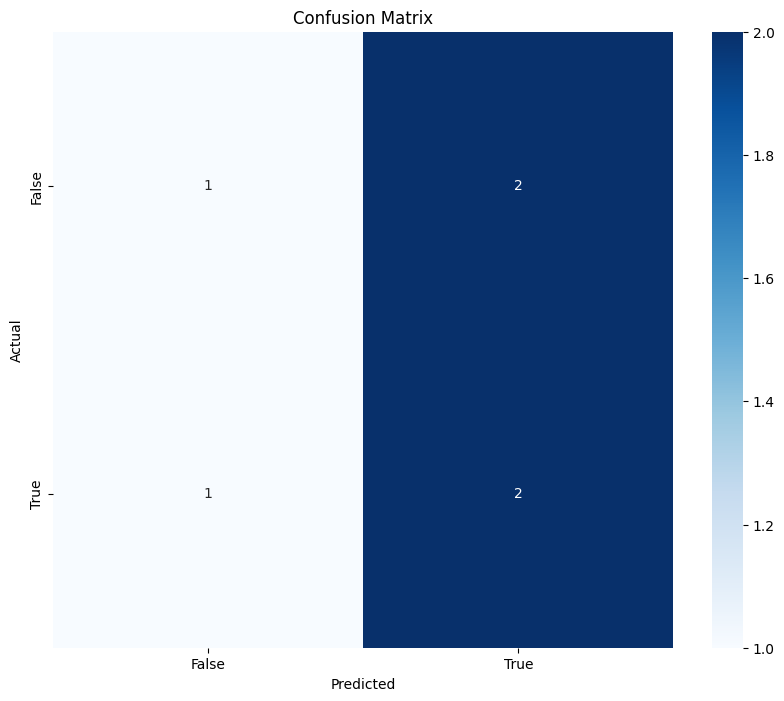

In [12]:
import os
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


def load_pt_file(file_name):
    try:
        data = torch.load(file_name)
        opensmile_features = data['opensmile']
        return opensmile_features
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name} - {e}")
        return None

base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'


target_pt_suffix = 'Rainbow-Passage_rec-Rainbow-Passage.pt'


def extract_features_labels(df, base_dir, target_pt_suffix):
    features = []
    labels = []
    for _, row in df.iterrows():
        subject_id = f"sub-{row['record_id']}"
        session_id = f"ses-{row['demographics_session_id']}"
        race = row['new_race___5']
        subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
        
        if not os.path.exists(subject_folder):
            print(f"Subject folder does not exist: {subject_folder}")
            continue

        found_file = False
        for file_name in os.listdir(subject_folder):
            if file_name.endswith(target_pt_suffix):
                file_path = os.path.join(subject_folder, file_name)
                # print(f"Found file: {file_path}")
                opensmile_features = load_pt_file(file_path)
                if opensmile_features is not None:
                    flattened_features = np.concatenate([opensmile_features[key] for key in opensmile_features.keys()])
                    features.append(flattened_features)
                    labels.append(race)
                found_file = True
                break
        if not found_file:
            print(f"No matching file found for subject {subject_id}")

    return np.array(features).squeeze(), np.array(labels)


X_train, y_train = extract_features_labels(df_train, base_dir, target_pt_suffix)
X_val, y_val = extract_features_labels(df_val, base_dir, target_pt_suffix)
X_test, y_test = extract_features_labels(df_test, base_dir, target_pt_suffix)

if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
    print("No features or labels were extracted. Exiting.")
    exit()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


k_best = 20  
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train_scaled, y_train_encoded)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

estimator = LogisticRegression(max_iter=1000)
selector_rfe = RFE(estimator, n_features_to_select=30)
X_train_rfe = selector_rfe.fit_transform(X_train_selected, y_train_encoded)
X_val_rfe = selector_rfe.transform(X_val_selected)
X_test_rfe = selector_rfe.transform(X_test_selected)


X_train_tensor = torch.tensor(X_train_rfe, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_rfe, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_rfe, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * (X_train_tensor.shape[1] // 4), 128)
        self.fc2 = nn.Linear(128, len(label_encoder.classes_))
        self.pool = nn.MaxPool1d(2, 2)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

model.eval()
y_val_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.unsqueeze(1) 
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_val_pred.extend(predicted.cpu().numpy())

val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_encoded, y_val_pred, target_names=label_encoder.classes_.astype(str)))

# Test the model
y_test_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1)  
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_test_pred.extend(predicted.cpu().numpy())

test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.astype(str)))

# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test_encoded, y_test_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [13]:

y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

new_race_true_indices = np.where(df_test['new_race___5'] == True)[0]
new_race_false_indices = np.where(df_test['new_race___5'] == False)[0]


true_labels_true_race = y_test[new_race_true_indices]
pred_labels_true_race = y_test_pred_labels[new_race_true_indices]

true_labels_false_race = y_test[new_race_false_indices]
pred_labels_false_race = y_test_pred_labels[new_race_false_indices]

print("\nFor records where new_race___5 is True:")
print("True Labels:", true_labels_true_race)
print("Predicted Labels:", pred_labels_true_race)

print("\nFor records where new_race___5 is False:")
print("True Labels:", true_labels_false_race)
print("Predicted Labels:", pred_labels_false_race)




For records where new_race___5 is True:
True Labels: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Predicted Labels: [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True]

For records where new_race___5 is False:
True Labels: [False False False]
Predicted Labels: [ True  True  True]


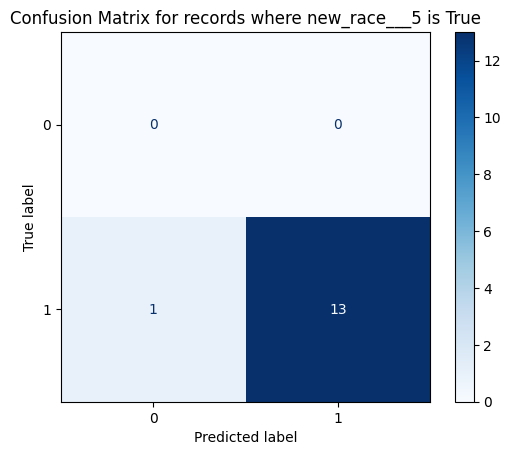

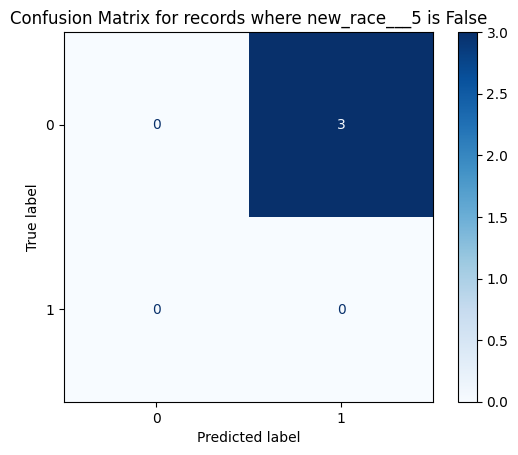

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

new_race_true_indices = np.where(df_test['new_race___5'] == True)[0]
new_race_false_indices = np.where(df_test['new_race___5'] == False)[0]


true_labels_true_race = y_test[new_race_true_indices]
pred_labels_true_race = y_test_pred_labels[new_race_true_indices]

true_labels_false_race = y_test[new_race_false_indices]
pred_labels_false_race = y_test_pred_labels[new_race_false_indices]


cm_true_race = confusion_matrix(true_labels_true_race, pred_labels_true_race)
cm_false_race = confusion_matrix(true_labels_false_race, pred_labels_false_race)


def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot for records where new_race___5 is True
plot_confusion_matrix(cm_true_race, 'Confusion Matrix for records where new_race___5 is True')

# Plot for records where new_race___5 is False
plot_confusion_matrix(cm_false_race, 'Confusion Matrix for records where new_race___5 is False')


Epoch 1/15


c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.6250 - loss: 7.7795 - val_accuracy: 0.3333 - val_loss: 133.6281
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5035 - loss: 39.6920 - val_accuracy: 0.5000 - val_loss: 38.3046
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7014 - loss: 39.9637 - val_accuracy: 0.5000 - val_loss: 22.5925
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7778 - loss: 1.0889 - val_accuracy: 0.1667 - val_loss: 14.6840
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8993 - loss: 0.4367 - val_accuracy: 0.1667 - val_loss: 11.0019
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8993 - loss: 0.2491 - val_accuracy: 0.1667 - val_loss: 8.1281
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8854 - loss: 0.2080 - val_accuracy: 0.1667 - val_loss: 5.4734
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9132 - loss: 0.1896 - val_accuracy: 0.3333 - val_loss: 3.9041
Ep

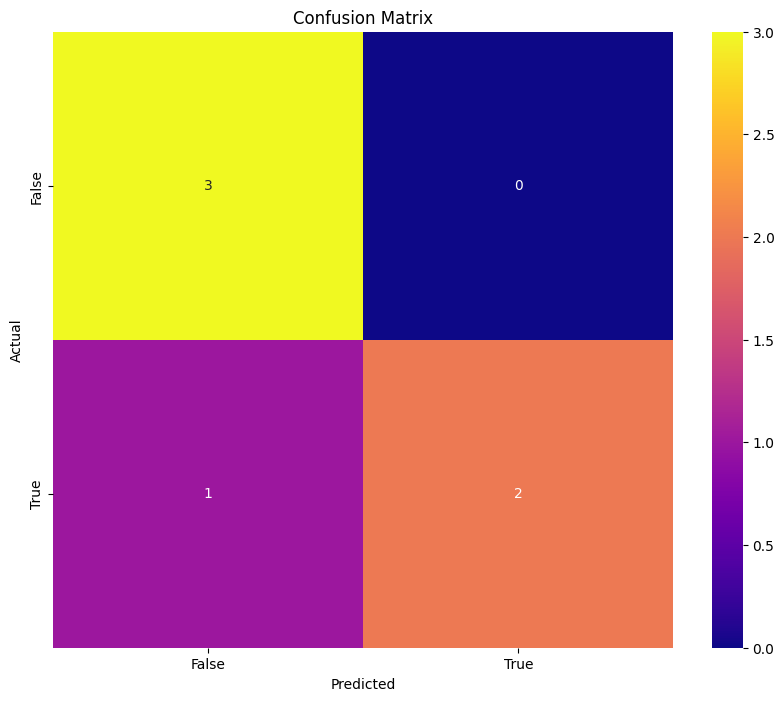

In [24]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


desired_duration = 20

# Base directory
base_dir = 'C:/Users/shrra/Downloads/Bridge2AI_fil/bridge2ai-voice-corpus-2-including-sensitive-recordings/bids_with_sensitive_recordings'


target_wav_suffix = 'Rainbow-Passage_rec-Rainbow-Passage_trimmed.wav'


def load_wav_file(file_path, duration):
    try:
        y, sr = librosa.load(file_path, sr=None)
        target_samples = duration * sr

        if len(y) > target_samples:
            y = y[:int(target_samples)] 
        else:
            y = np.pad(y, (0, int(target_samples) - len(y)), 'constant')  

        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        return mel_spectrogram
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path} - {e}")
        return None

def extract_features_labels(df, base_dir, target_wav_suffix, duration):
    features = []
    labels = []
    for _, row in df.iterrows():
        subject_id = f"sub-{row['record_id']}"
        session_id = f"ses-{row['demographics_session_id']}"
        race = row['new_race___5']
        subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
        
        if not os.path.exists(subject_folder):
            print(f"Subject folder does not exist: {subject_folder}")
            continue

        found_file = False
        for file_name in os.listdir(subject_folder):
            if file_name.endswith(target_wav_suffix):
                file_path = os.path.join(subject_folder, file_name)
                mel_spectrogram = load_wav_file(file_path, duration)
                if mel_spectrogram is not None:
                    features.append(mel_spectrogram.T) 
                    labels.append(race)
                found_file = True
                break
        if not found_file:
            print(f"No matching file found for subject {subject_id}")

    return np.array(features), np.array(labels)


X_train, y_train = extract_features_labels(df_train, base_dir, target_wav_suffix, desired_duration)
X_val, y_val = extract_features_labels(df_val, base_dir, target_wav_suffix, desired_duration)
X_test, y_test = extract_features_labels(df_test, base_dir, target_wav_suffix, desired_duration)


if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
    print("No features or labels were extracted. Exiting.")
    exit()


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], -1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))


model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

learning_rate = 0.005 

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_epochs = 15
history = model.fit(X_train_reshaped, y_train_encoded, 
                    epochs=num_epochs, 
                    validation_data=(X_val_reshaped, y_val_encoded),
                    batch_size=32)

val_loss, val_accuracy = model.evaluate(X_val_reshaped, y_val_encoded)
print(f"\nValidation Accuracy: {val_accuracy}")


y_test_pred = model.predict(X_test_reshaped)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

test_accuracy = accuracy_score(y_test_encoded, y_test_pred_classes)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_encoded, y_test_pred_classes, target_names=label_encoder.classes_.astype(str)))

conf_mat = confusion_matrix(y_test_encoded, y_test_pred_classes)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


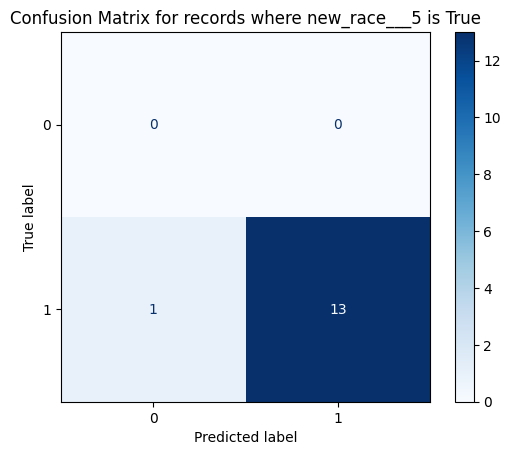

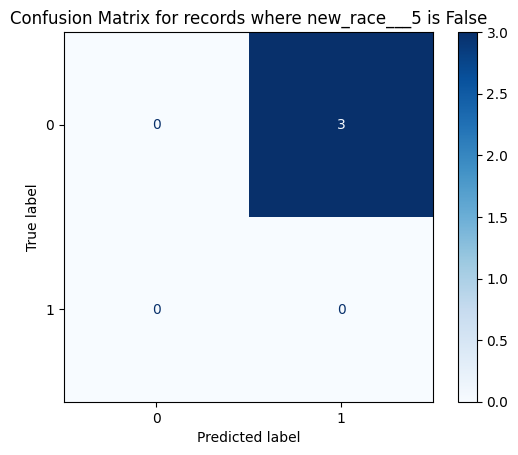

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test_pred_labels and y_test are already defined
# Extract indices for new_race___5 is True and False
new_race_true_indices = np.where(df_test['new_race___5'] == True)[0]
new_race_false_indices = np.where(df_test['new_race___5'] == False)[0]

# Extract true labels and predictions for these indices
true_labels_true_race = y_test[new_race_true_indices]
pred_labels_true_race = y_test_pred_labels[new_race_true_indices]

true_labels_false_race = y_test[new_race_false_indices]
pred_labels_false_race = y_test_pred_labels[new_race_false_indices]

# Calculate confusion matrices
cm_true_race = confusion_matrix(true_labels_true_race, pred_labels_true_race)
cm_false_race = confusion_matrix(true_labels_false_race, pred_labels_false_race)

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot for records where new_race___5 is True
plot_confusion_matrix(cm_true_race, 'Confusion Matrix for records where new_race___5 is True')

# Plot for records where new_race___5 is False
plot_confusion_matrix(cm_false_race, 'Confusion Matrix for records where new_race___5 is False')


In [19]:
feature_list=['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']


selected_feature_names = [feature_list[i] for i in range(len(feature_list)) if significant_features[i]]
print(f"Selected feature names: {selected_feature_names}")

Selected feature names: ['F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'loudness_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc3_sma3_amean', 'jitterLocal_sma3nz_amean', 'shimmerLocaldB_sma3nz_amean', 'shimmerLocaldB_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean', 'F2bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean', 'hammarbergIndexV_sma3nz_amean', 'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'hammarbergIndexUV_sma3nz_amean', 'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec', 'equivalentSoundLevel_dBp']


Epoch 1/45, Loss: 0.5079666554927826
Epoch 2/45, Loss: 0.3884878814220428
Epoch 3/45, Loss: 0.5795018017292023
Epoch 4/45, Loss: 0.4170907735824585
Epoch 5/45, Loss: 0.49557551741600037
Epoch 6/45, Loss: 0.39882909059524535
Epoch 7/45, Loss: 0.4264490008354187
Epoch 8/45, Loss: 0.4682177245616913
Epoch 9/45, Loss: 0.4937267303466797
Epoch 10/45, Loss: 0.3894797503948212
Epoch 11/45, Loss: 0.3568755567073822
Epoch 12/45, Loss: 0.3960185647010803
Epoch 13/45, Loss: 0.48669229745864867
Epoch 14/45, Loss: 0.369124162197113
Epoch 15/45, Loss: 0.3600649982690811
Epoch 16/45, Loss: 0.5532544016838074
Epoch 17/45, Loss: 0.3336129665374756
Epoch 18/45, Loss: 0.39425591230392454
Epoch 19/45, Loss: 0.3714801073074341
Epoch 20/45, Loss: 0.33934717178344725
Epoch 21/45, Loss: 0.3169368922710419
Epoch 22/45, Loss: 0.26775690317153933
Epoch 23/45, Loss: 0.2906868666410446
Epoch 24/45, Loss: 0.2610878750681877
Epoch 25/45, Loss: 0.27482904195785524
Epoch 26/45, Loss: 0.2776728212833405
Epoch 27/45, Lo

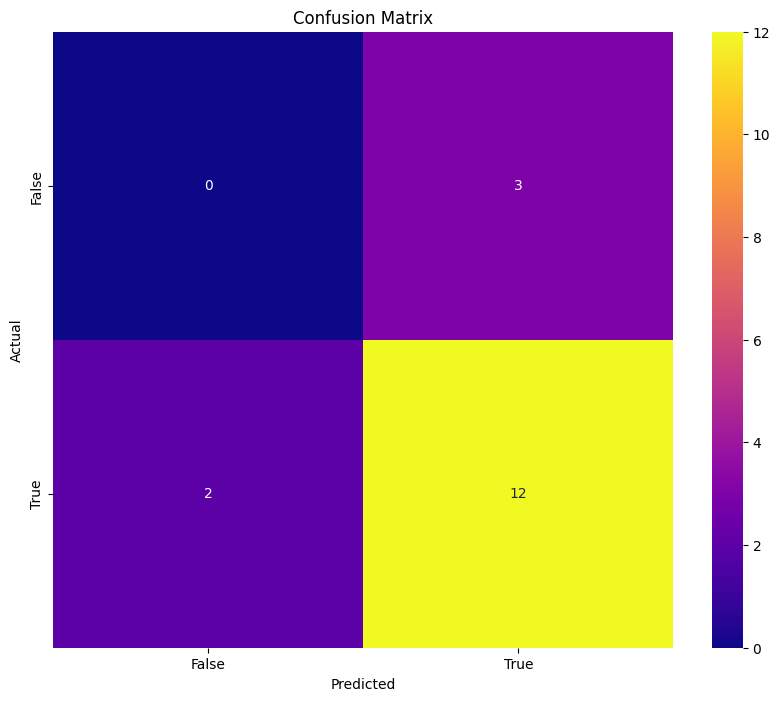

Number of significant features: 23
Indices of significant features: [5, 6, 7, 11, 24, 26, 30, 32, 33, 37, 38, 48, 49, 58, 60, 67, 69, 70, 72, 77, 83, 84, 87]
Selected feature names: ['F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'loudness_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc3_sma3_amean', 'jitterLocal_sma3nz_amean', 'shimmerLocaldB_sma3nz_amean', 'shimmerLocaldB_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean', 'F2bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean', 'hammarbergIndexV_sma3nz_amean', 'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'hammarbergIndexUV_sma3nz_amean', 'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec', 'equivalentSoundLevel_dBp']


In [21]:
import os
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from scipy import stats


def load_pt_file(file_name):
    try:
        data = torch.load(file_name)
        opensmile_features = data['opensmile']
        return opensmile_features
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name} - {e}")
        return None


base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'

# PT file suffix to check for
# target_pt_suffix = 'Prolonged-vowel_rec-Prolonged-vowel.pt'
target_pt_suffix = 'Rainbow-Passage_rec-Rainbow-Passage.pt'

def extract_features_labels(df, base_dir, target_pt_suffix):
    features = []
    labels = []
    for _, row in df.iterrows():
        subject_id = f"sub-{row['record_id']}"
        session_id = f"ses-{row['demographics_session_id']}"
        race = row['new_race___5']
        subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
        
        if not os.path.exists(subject_folder):
            print(f"Subject folder does not exist: {subject_folder}")
            continue

        found_file = False
        for file_name in os.listdir(subject_folder):
            if file_name.endswith(target_pt_suffix):
                file_path = os.path.join(subject_folder, file_name)
                # print(f"Found file: {file_path}")
                opensmile_features = load_pt_file(file_path)
                if opensmile_features is not None:
                    flattened_features = np.concatenate([opensmile_features[key] for key in opensmile_features.keys()])
                    features.append(flattened_features)
                    labels.append(race)
                found_file = True
                break
        if not found_file:
            print(f"No matching file found for subject {subject_id}")

    return np.array(features).squeeze(), np.array(labels)


X_train, y_train = extract_features_labels(df_train, base_dir, target_pt_suffix)
X_val, y_val = extract_features_labels(df_val, base_dir, target_pt_suffix)
X_test, y_test = extract_features_labels(df_test, base_dir, target_pt_suffix)


if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
    print("No features or labels were extracted. Exiting.")
    exit()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# significant feature indices
significant_feature_indices = [5, 6, 7, 11, 24, 26, 30, 32, 33, 37, 38, 48, 49, 58, 60, 67, 69, 70, 72, 77, 83, 84, 87]
significant_features = np.zeros(X_train_scaled.shape[1], dtype=bool)
significant_features[significant_feature_indices] = True


X_train_filtered = X_train_scaled[:, significant_features]
X_val_filtered = X_val_scaled[:, significant_features]
X_test_filtered = X_test_scaled[:, significant_features]


X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_filtered, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_filtered, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * (X_train_tensor.shape[1] // 4), 128)
        self.fc2 = nn.Linear(128, len(label_encoder.classes_))
        self.pool = nn.MaxPool1d(2, 2)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 45
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Validate the model
model.eval()
y_val_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.unsqueeze(1) 
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_val_pred.extend(predicted.cpu().numpy())

val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_encoded, y_val_pred, target_names=label_encoder.classes_.astype(str)))

# Test the model
y_test_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1)  # Add channel dimension
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_test_pred.extend(predicted.cpu().numpy())

test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.astype(str)))

# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test_encoded, y_test_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Display significant feature information
print(f"Number of significant features: {np.sum(significant_features)}")
print(f"Indices of significant features: {significant_feature_indices}")
print(f"Selected feature names: {selected_feature_names}")
